**Autor**: 
Matheus Jericó Palhares <br>
**LinkedIn**:
https://www.linkedin.com/in/matheusjerico

# Dataset: Bank Marketing

**Fonte oficial do dataset :** https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Dados:** https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

Arquivos incluídos no link acima:

- **bank.csv:** uma versão reduzida do conjunto de dados; <br>
- **bank-full.csv:** o conjunto completo; <br>
- **bank-names.txt:** com a descrição dos campos do conjunto de dados.

Para a resolução deste teste utilize o arquivo **bank-full.csv** e para uma descrição sobre
o *dataset* use **bank-names.txt** e/ou a fonte oficial.


#### O que é um *Term Deposit* (depósito a prazo)?

Um depósito a prazo é um produto bancário que pressupõe a entrega de fundos a uma instituição de crédito, que fica obrigada a restituir esses fundos no final de um período de tempo acordado e ao pagamento de uma remuneração, designada de juro. (https://www.todoscontam.pt/pt-pt/depositos-prazo)

#### Para balancear os dados:
https://kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/

## Questões
1. **Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**<br>
2. **Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?**
3. **Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**
4. **O resultado da campanha anterior tem relevância na campanha atual?**
5. **Qual o fator determinante para que o banco exija um seguro de crédito?**
6. **Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**

## Descrição dos dados

#### Dados dos clientes: 
1. **age**: idade do cliente (numérico);
2. **job**: tipo de trabalho (categórico: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services");
3. **marital**: estado civil (categórico: "married", "divorced", "single"; note: "divorced" means divorced or widowed);
4. **education**: nível de educação (categórico: "unknown","secondary","primary","tertiary");
5. **default**: tem crédito por padrão (binário: 'no','yes');
6. **balance**: saldo médio anual, em euros (numérico);
7. **housing**: empréstimo para comprar casa (binário: "yes","no");
8. **loan**: empréstimo para uso pessoal (binário: "yes","no");

#### Dados relacionados ao último contato da campanha atual: 
9. **contact**: tipo de comunicação utilizado para contato (categórico: "unknown", "telephone", "cellular"); 
10. **day**: último dia de contato do mês (numérico);
11. **month**: último mês de contato do ano (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12. **duration**: duração do último contato, em segundos (numérico);

#### Outros dados: 
13. **campaign**: número de contatos realizados durante esta campanha e para este cliente (numérico, incluindo últimos contatos);
14. **pdays**: número de dias que passaram após o último contato do cliente de uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente);
15. **previous**: número de contatos realizados antes desta campanha e para este cliente (numérico);
16. **poutcome**: resultado da campanha de marketing anterior (categórico: "unknown", "other", "failure", "success");

#### Variável de saída: 
17. **y**: o cliente assinou um term deposit (depósito a prazo)? (binário: "yes", "no")


## Bibliotecas utilizadas:
- Pandas (https://pandas.pydata.org/);
- NumPy (https://numpy.org/);
- Seaborn (https://seaborn.pydata.org/);
- Matplotlib (https://matplotlib.org/);
- SciPy (https://www.scipy.org/);
- Scikit-learn (https://scikit-learn.org/stable/);
- XGBoost (https://xgboost.readthedocs.io/en/latest/);
- Imbalanced-learn (https://imbalanced-learn.readthedocs.io/en/stable/api.html);
- Warnings (https://docs.python.org/3/library/warnings.html).

# INICIANDO SOLUÇÃO DO PROBLEMA PROPOSTO

## 1. BAIXANDO OS DADOS

In [1]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
# !unzip bank.zip -d bank; rm -rf bank.zip

## 2. IMPORTANDO PACOTES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/matheus/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/matheus/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/matheus/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

## 3. IMPORTANDO DADOS E PRIMEIRA ANÁLISE

In [3]:
dataset = pd.read_csv("bank/bank-full.csv", sep = ";")

In [4]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### 3.1. Informações sobre as variáveis e existência de valores nulos:
- O dataset não possui valores nulos;
- Todas as variáveis consideradas numéricas estão como variável do tipo inteiro;
- 45211 registros;
- 7 variáveis do tipo inteiro e 10 variáveis do tipo objeto.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 3.2 Medidas de Tendência Central e Medidas de Dispersão
- **age**: Valor médio da idade é de aproximadamente 41 anos, variando de 18 até 95 anos;
- **balance**: Saldo médio anual (euros) é de 1362.27, com desvio padrão elevado (~ 2x do valor da média);
- **campaign**: Em média, foram realizado aproximadamente 3 contatos com um cliente (único);

In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 3.3. Os dados estão balanceados de acordo com a variável target (term deposit)?
- Os dados estão desbalanceados, fator que pode enviesar o resultado do modelo.

In [7]:
dataset['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## 4. ANÁLISE EXPLORATÓRIA

- Skewness (Assimetria):
    - Se o valor de skewness está entre -0.5 e 0.5, os dados são bastante simétricos
    - Se o valor de skewness está entre -1 e -0.5 ou entre 0.5 e 1, os dados estão moderadamente inclinados
    - Se o valor de skewness é menor que -1 ou maior que 1, os dados são altamente distorcidos

- Kurtosis (Curtose):
    - Se kurtosis=0, então a função de distribuição tem o mesmo achatamento da distribuição normal, chamamos essas funções de mesócurticas.
    - Se kurtosis > 0, dizemos que a função de distribuição é leptocúrtica e possui a curva da função de distribuição mais afunilada com um pico mais alto do que a distribuição normal. Neste caso dizemos que essa distribuição possui caudas pesadas.
    - Se kurtosis < 0, então a funçao de distribuição é mais achatada do que a distribuição normal. Dizemos que esta curva da função de distribuição é platicúrtica.

### 4.1 Distribuição dos Dados das variáveis numéricas utilizando Histograma e Box Plot

#### 4.1.1. Variável *Age*:

Text(0.5, 1.05, 'Age')

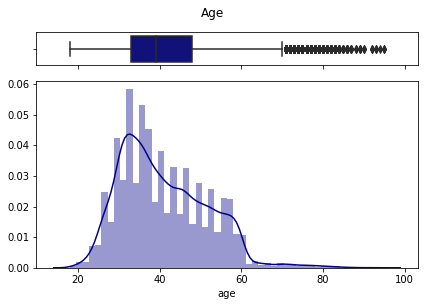

In [8]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["age"], color = "#00008B", ax=ax_box)
sns.distplot(dataset["age"], color = "#00008B", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Age", y = 1.05)

In [9]:
print("Valor de Assimetria: {}".format(skew(dataset['age'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['age'])))

Valor de Assimetria: 0.6847952047866451
Valor de Curtose: 0.31940232676995794


- Os dados da feature *age* estão moderadamente inclinados e possui um pico um pouco maior que o da distribuição normal;
- Alta quantidade de outliers.

#### 4.1.2 Variável *Balance*:

Text(0.5, 1.05, 'Balance')

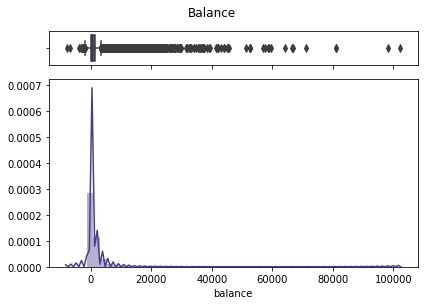

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["balance"], color = '#483D8B', ax=ax_box)
sns.distplot(dataset["balance"], color = '#483D8B', ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Balance", y = 1.05)

In [11]:
print("Valor de Assimetria: {}".format(skew(dataset['balance'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['balance'])))

Valor de Assimetria: 8.360030947252687
Valor de Curtose: 140.73584832577242


- Altíssima quantidade de outliers;
- Distribuição muito assimétrica;
- Pico muito maior comparado a uma distribuição normal.

#### 4.1.3. Variável *Day*:

Text(0.5, 1.05, 'Day')

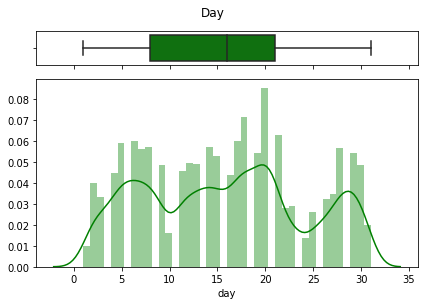

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["day"], color = "#008000", ax=ax_box)
sns.distplot(dataset["day"], color = "#008000", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Day", y = 1.05)

In [13]:
print("Valor de Assimetria: {}".format(skew(dataset['day'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['day'])))

Valor de Assimetria: 0.09307592583897241
Valor de Curtose: -1.0599128678304488


- A variável *day* possui dados bem distribuidos e simétricos;
- Os dados estão mais achatados quando comparado a uma distribuição normal.

#### 4.1.4. Variável *Duration*:

Text(0.5, 1.05, 'Duration')

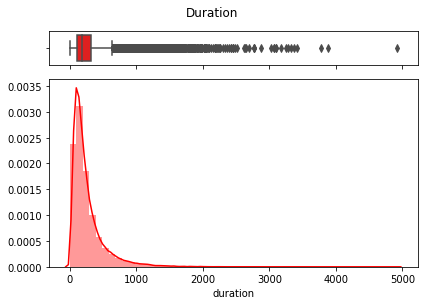

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["duration"], color = "#FF0000", ax=ax_box)
sns.distplot(dataset["duration"], color = "#FF0000", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Duration", y = 1.05)

In [15]:
print("Valor de Assimetria: {}".format(skew(dataset['duration'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['duration'])))

Valor de Assimetria: 3.1442137770103913
Valor de Curtose: 18.151774935186822


- Distribuição muito assimétrica;
- Pico muito maior comparado a uma distribuição normal;
- Alta quantidade de outliers.

#### 4.1.5. Variável *Campaign*:

Text(0.5, 1.05, 'Campaign')

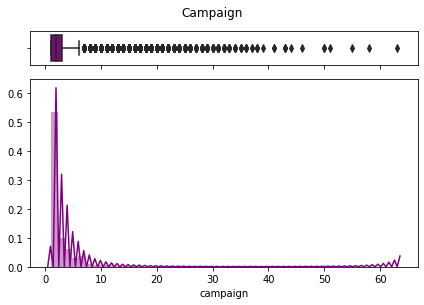

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["campaign"], color = "#800080", ax=ax_box)
sns.distplot(dataset["campaign"], color = "#800080", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Campaign", y = 1.05)

In [17]:
print("Valor de Assimetria: {}".format(skew(dataset['campaign'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['campaign'])))

Valor de Assimetria: 4.898487638410557
Valor de Curtose: 39.24517750942221


- Distribuição muito assimétrica;
- Pico muito maior comparado a uma distribuição normal;
- Alta quantidade de outliers.

#### 4.1.6. Variável *Pdays*

Text(0.5, 1.05, 'Pdays')

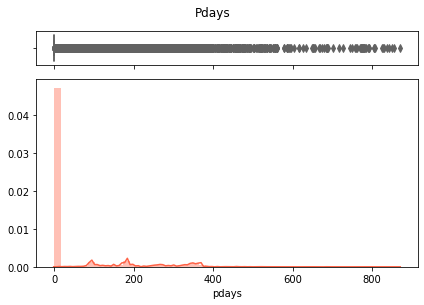

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["pdays"], color = "#FF6347", ax=ax_box)
sns.distplot(dataset["pdays"], color = "#FF6347", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Pdays", y = 1.05)

In [19]:
print("Valor de Assimetria: {}".format(skew(dataset['pdays'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['pdays'])))

Valor de Assimetria: 2.615628689259389
Valor de Curtose: 6.934295545084991


- Distribuição muito assimétrica;
- Pico muito maior comparado a uma distribuição normal;
- Alta quantidade de outliers.

#### 4.1.7 Variável *Previous*

Text(0.5, 1.05, 'Previous')

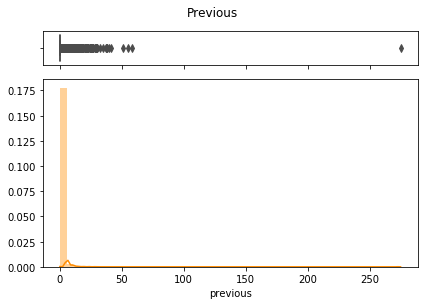

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataset["previous"], color = "#FF8C00", ax=ax_box)
sns.distplot(dataset["previous"], color = "#FF8C00", ax=ax_hist)

ax_box.set(xlabel='')

f.tight_layout()
f.suptitle("Previous", y = 1.05)

In [21]:
print("Valor de Assimetria: {}".format(skew(dataset['previous'])))
print("Valor de Curtose: {}".format(kurtosis(dataset['previous'])))

Valor de Assimetria: 41.84506608797322
Valor de Curtose: 4506.362117674052


- Distribuição muito assimétrica;
- Pico muito maior comparado a uma distribuição normal;
- Alta quantidade de outliers.

**Análise**:
- A maior parte das variáveis não possuem distribuição normal, sendo necessário aplicar técnicas para normalização/padronização dos dados

### 4.2 Distribuição dos dados das variáveis categóricas utilizando Count Plot

#### 4.2.1. Variáveis *Job, Marital, Education*

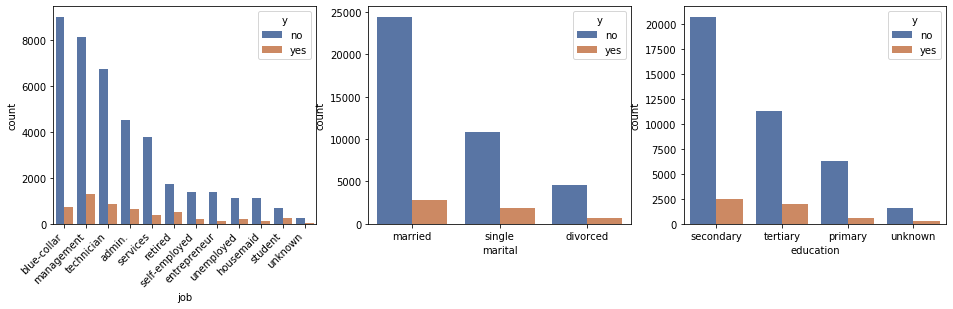

In [22]:
plt.figure(figsize=[16,4])

plt.subplot(1,3,1)
chart = sns.countplot(x='job', hue='y', data=dataset, palette="deep", order = dataset['job'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,3,2)
sns.countplot(x='marital', hue='y', data=dataset, palette="deep", order = dataset['marital'].value_counts().index)

plt.subplot(1,3,3)
sns.countplot(x='education', hue='y', data=dataset, palette="deep", order = dataset['education'].value_counts().index)

plt.show()

**Análise:**
- ***Job***: ***blue-collar, management, technician*** são as ocupações predominantes;
- ***Marital***: ***married*** é o estado civil predominante;
- ***Education***: ***secondary*** é a escolaridade com maior quantidade de registros.


#### 4.2.2. Variáveis *Default, Housing, Loan*

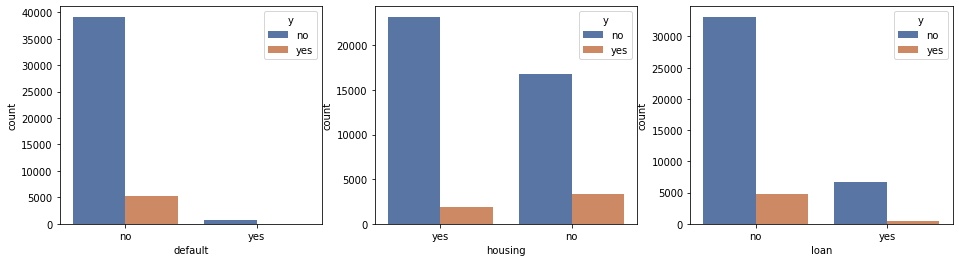

In [23]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.countplot(x='default', hue='y', data=dataset,palette="deep", order = dataset['default'].value_counts().index)
plt.subplot(1,3,2)
sns.countplot(x='housing', hue='y', data=dataset,palette="deep", order = dataset['housing'].value_counts().index)
plt.subplot(1,3,3)
sns.countplot(x='loan', hue='y', data=dataset,palette="deep", order = dataset['loan'].value_counts().index)
plt.show()

**Análise:**
- ***Default***: pessoas que não possuem crédito por padrão são predominantes;
- ***Housing***: pessoas que possuem empréstimo para imóveis são predominantes;
- ***Loan***: pessoas que não possuem empréstimo pessoal são predominantes.


#### 4.2.2. Variáveis *Contact, Month, Poutcome*

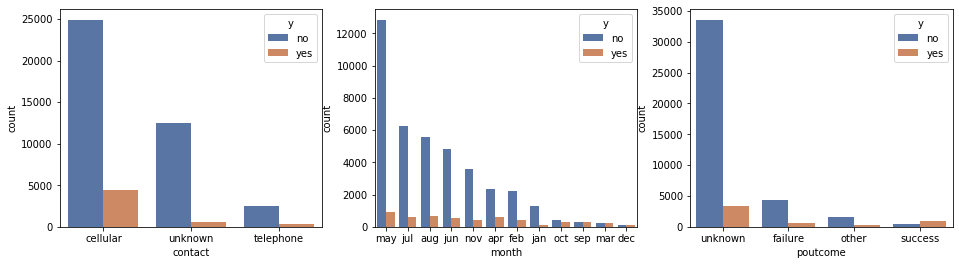

In [24]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.countplot(x='contact', hue='y', data=dataset,palette="deep", order = dataset['contact'].value_counts().index)
plt.subplot(1,3,2)
sns.countplot(x='month', hue='y', data=dataset,palette="deep", order = dataset['month'].value_counts().index)
plt.subplot(1,3,3)
sns.countplot(x='poutcome', hue='y', data=dataset,palette="deep", order = dataset['poutcome'].value_counts().index)
plt.show()

**Análise:**
- ***Contact***: a maior parte dos contatos realizados pelo banco é por ***cellular***;
- ***Month***: ***may, jul, aug*** e ***jun*** são os meses que ocorreram os contatos;
- ***Poutcome***: a maior parte das pessoas no dataset não participaram da campanha anterior.


#### 4.2.3. Variável target (y)

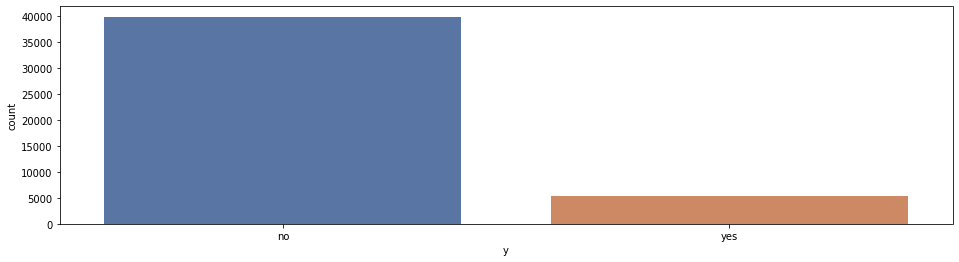

In [25]:
plt.figure(figsize=[16,4])
sns.countplot(x='y', data=dataset,palette="deep")

**Análise:**
- Como visto anteriormente, a maior quantidade de pessoas presentes no dataset não realizaram depósito a prazo;
- O dataset está totalmente desbalanceado.

### 4.3 Estimativa da tendência central com Bar Plot

- Analisar as medidas de tendência central e dispersão, nos casos de sucesso da campanha.

In [26]:
colunas_categoricas =list(set(dataset.columns) - set(dataset._get_numeric_data().columns))
le = LabelEncoder()
dataset['y'] = le.fit_transform(dataset['y'])

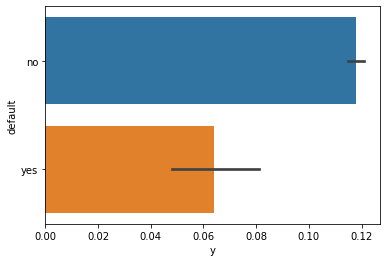

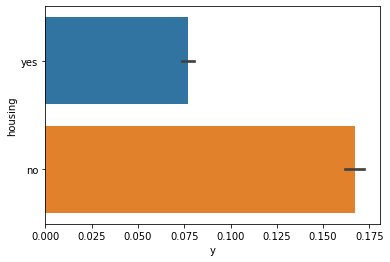

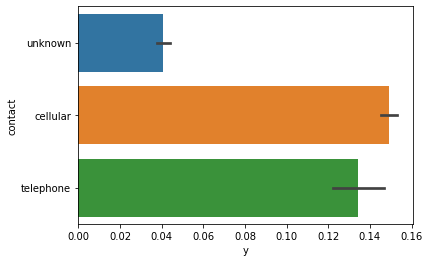

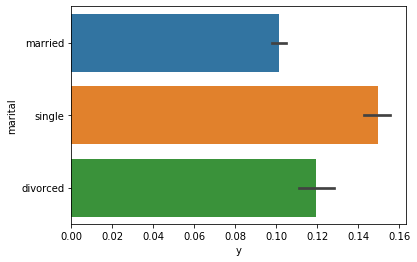

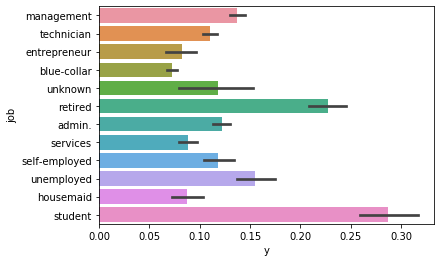

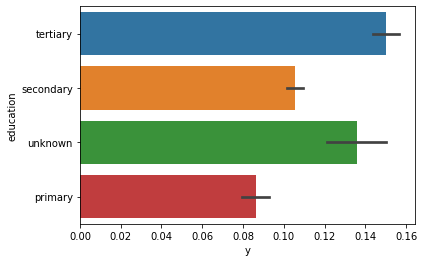

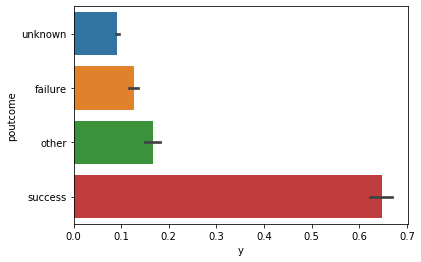

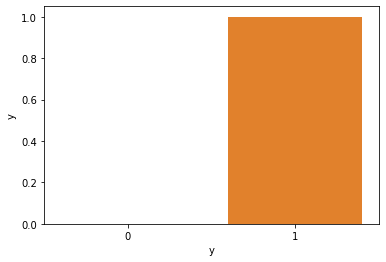

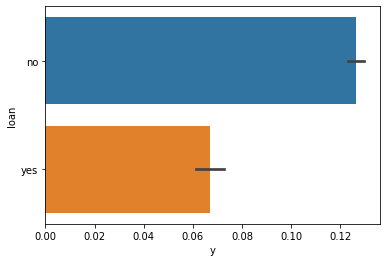

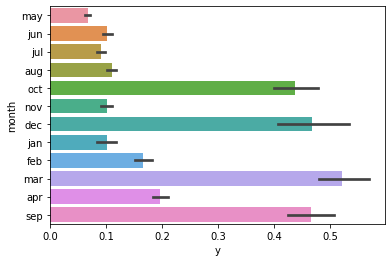

In [27]:
for coluna in dataset[colunas_categoricas]:
    sns.barplot(dataset['y'], dataset[coluna])
    plt.show()
dataset['y'] = le.inverse_transform(dataset['y'])

**Análise**
- Feature ***Job***: ***Student*** e ***Retired*** são as ocupações que possuem maior porcentagem de pessoas que realizaram depósito à prazo;
- Feature ***Marital***: ***Single*** é o estado civil que possue maior porcentagem de pessoas que realizaram depósito à prazo;
- Feature ***Month***: Os meses de Março, Dezembro, Setembro e Outubro foram os meses que tiveram maior porcentagem de pessoas realizando depósito à prazo;
- Feature ***Poutcome***: Quando o resultado da campanha anterior é bem sucedido, a probabilidade da pessoa realizar um depósito à prazo é de aproximadamente 65% em média;


### 4.3 Relacionamento entre as variáveis utilizando Box Plot


#### 4.3.1. Job x Age

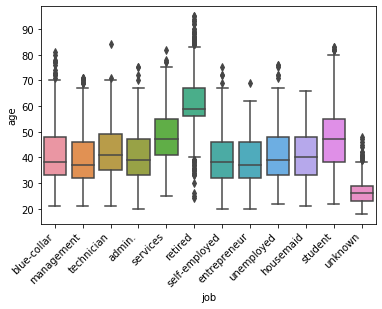

In [28]:
ax = sns.boxplot(x="job", y="age", data=dataset)
_ = ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### 4.3.2. Y x Duration

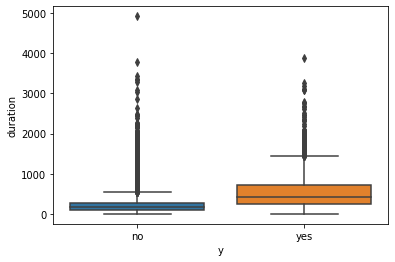

In [29]:
ax = sns.boxplot(x="y", y="duration", data=dataset)

**Análise**:
- Os aposentados são os que têm a maior idade mediana.
- A mediana da duração da ligação quando obteve sucesso é maior do que quando não obteve sucesso.

### 4.4 Analisando se a Quantidade de Contatos realizados durante a campanha

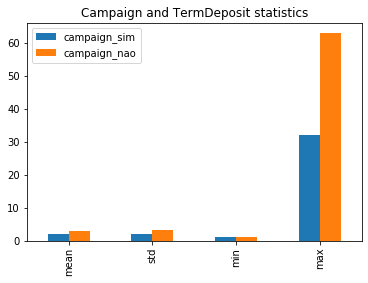

In [30]:
df_campaign = pd.DataFrame()
df_campaign['campaign_sim'] = (dataset[dataset['y'] == 'yes'][['y','campaign']].describe())['campaign']
df_campaign['campaign_nao'] = (dataset[dataset['y'] == 'no'][['y','campaign']].describe())['campaign']

df_campaign.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign and TermDeposit statistics')

### 5. PROCESSAMENTO DOS DADOS

### 5.1 Transformação das variáveis (categóricas -> numéricas)

In [31]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
le = LabelEncoder()
variaveis_categoricas = ['job','marital','education','default','housing','loan','contact','month','poutcome']
variaveis_numericas = ['age','balance','day','duration','campaign','pdays','previous']
dataset_manipulado = pd.DataFrame()
dataset_manipulado[variaveis_categoricas] = dataset[variaveis_categoricas].apply(lambda x: le.fit_transform(x))
dataset_manipulado[variaveis_numericas] = dataset[variaveis_numericas]
dataset_manipulado['y'] = dataset[['y']].apply(lambda x: le.fit_transform(x))

In [33]:
dataset_manipulado.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,y
0,4,1,2,0,1,0,2,8,3,58,2143,5,261,1,-1,0,0
1,9,2,1,0,1,0,2,8,3,44,29,5,151,1,-1,0,0
2,2,1,1,0,1,1,2,8,3,33,2,5,76,1,-1,0,0
3,1,1,3,0,1,0,2,8,3,47,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,2,8,3,33,1,5,198,1,-1,0,0


### 5.2. Correlação dos dados

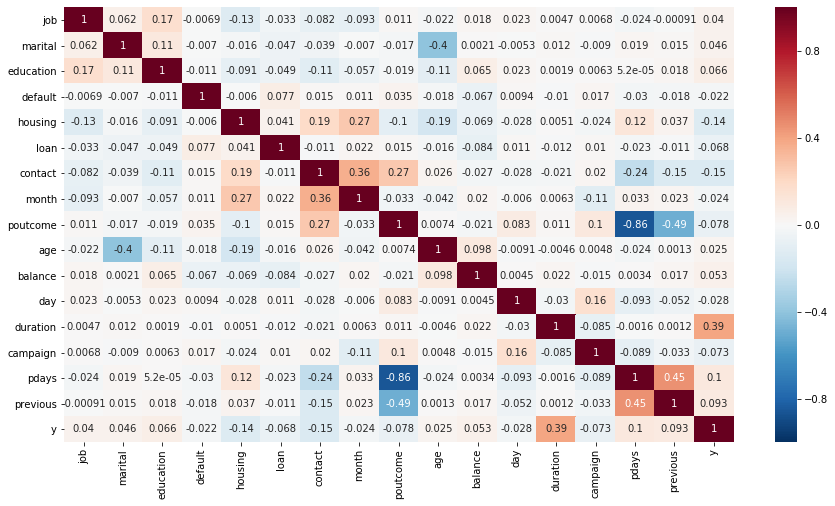

In [34]:
plt.figure(figsize=(15, 8))
heat_map = sns.heatmap(dataset_manipulado.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

**Análise**: 
- As features que apresentam os maiores valores de correlação com a variável target são:
    - ***duration***:         0.394;
    - ***contact***:         -0.148;
    - ***housing***:         -0.139;
    
Entretando, correlação não implica causalidade.

### 5.3. Features mais importantes utilizando o algoritmo Random Forest e Decision Tree

#### 5.3.1. Separando features e target

In [35]:
x = dataset_manipulado.drop(columns='y')
y = dataset_manipulado['y']

#### 5.3.2. Padronizando as features

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

#### 5.3.3. Criando Algoritmo para feature importance

In [37]:
random_forest_features = RandomForestClassifier(n_estimators=100, max_depth=15)
tree_features = DecisionTreeClassifier()

#### 5.3.4. Treinando Algoritmo

In [38]:
random_forest_features.fit(x, y)
tree_features.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 5.3.5. Ordenando features mais importantes

In [39]:
random_forest_features_imp = pd.Series(random_forest_features.feature_importances_,
                                       index = dataset_manipulado.columns[:-1])
random_forest_features_imp_order = random_forest_features_imp.sort_values()

tree_features_imp = pd.Series(tree_features.feature_importances_,
                              index = dataset_manipulado.columns[:-1])
tree_features_imp_order = tree_features_imp.sort_values()

#### 5.3.6 Visualizando resultados das features mais importantes

No handles with labels found to put in legend.
No handles with labels found to put in legend.


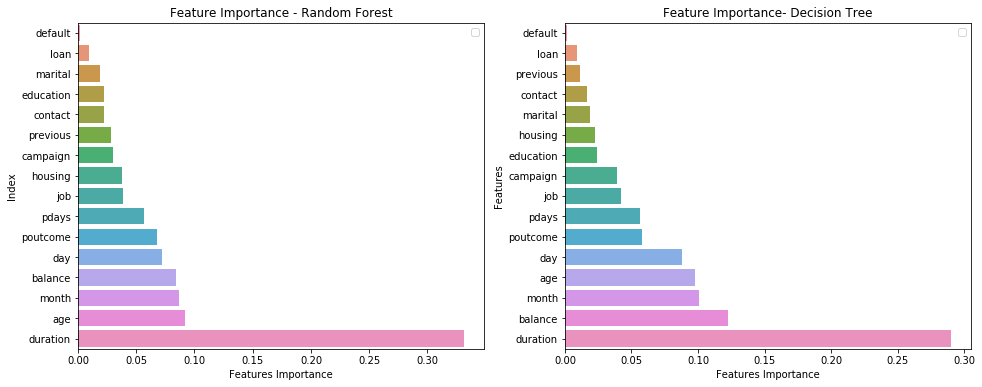

In [40]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
sns.barplot(x=random_forest_features_imp_order, y = random_forest_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance - Random Forest")
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x=tree_features_imp_order, y = tree_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Features")
plt.title("Feature Importance- Decision Tree")
plt.legend()
plt.show()

**Análise:**
- Para o lgoritmo Random Forest, as features mais importantes foram:
    1. **duration**;
    2. **age**;
    3. **month**;
    4. **balance**;
    5. **poutcome**.
    
- Para o algoritmo Decision Tree, as features mais importantes foram:
    1. **duration**;
    2. **balance**;
    3. **age**;
    4. **month**;
    5. **day**.
    
Entre os dois algoritmos, tivemos pouca divergência. Entretando, considerei o resultado das features mais importantes do algoritmo **Random Forest**, pois obteve um melhor desempenho para realizar predição da variável target com os dados de teste, o que será apresentado logo em seguida.

## 6. Aplicando Machine Learning para Predição se o cliente assinou um term deposit (depósito a prazo)

### 6.1. Comparando acurácia de 7 modelos de classificação utilizando validação cruzada
- Será selecionado 4 modelos para tunning de hiperparâmetros;
- Posteriormente, será selecionado o modelo que obter as melhores métricas.

In [41]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

modelos = []
modelos.append(("Logistic Regression", LogisticRegression()))
modelos.append(('Naive Bayes', GaussianNB()))
modelos.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
modelos.append(("Decision Tree", DecisionTreeClassifier()))
modelos.append(("Random Forest", RandomForestClassifier()))
modelos.append(("XGB Classifier", XGBClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, x, y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.846513 (0.080583)
Naive Bayes: 0.749718 (0.102126)
Gradient Boosting Classifier: 0.876373 (0.106026)
Decision Tree: 0.643603 (0.041039)
Random Forest: 0.870484 (0.097542)
XGB Classifier: 0.877908 (0.101237)
SVM: 0.804320 (0.085017)


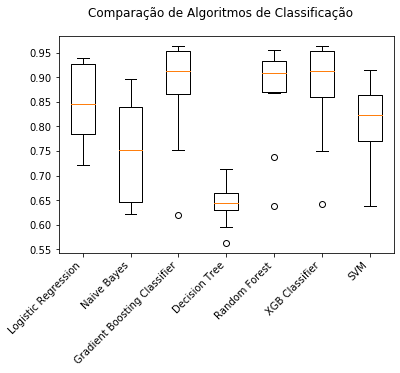

In [42]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

**Análise**:

- Selecionei os seguintes modelos:
    - Gradient Boosting Classifier;
    - Random Forest;
    - XGB Classifier;
    - Logistic Regression.

### 6.2. Separando os dados em treino e teste

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 6.3. Aplicando GridSearch para tunning e Validando com os dados de teste
- A métrica escolhida para otimizar os hiperparâmetros foi a ROC AUC, tendo em vista que o dataset é desbalanceado.
- Logo, a métrica escolhida para selecionar o melhor modelo foi a ROC AUC, pelo fato do dataset ser desbalanceado.

#### 6.3.1. Logistic Regression

In [44]:
# parâmetros da LogisticRegression
grid_rl = {"C":[0.001,0.009,0.01,.09,1,5,10,25],
           "penalty" : ["l1", "l2", "elasticnet"]}
# Criando modelo
logistic = LogisticRegression()
# Aplicando GridSearchCV
clf_lr = GridSearchCV(logistic, param_grid = grid_rl, cv=3, scoring = 'roc_auc', verbose=0)
# Treinando modelo
clf_lr.fit(X_train, y_train)
# Fazendo predições
y_pred_logistic = clf_lr.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_logistic))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_logistic))
print("------------------------------------------------------")
print("LogisticRegression roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_logistic)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.61      0.14      0.23      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.56      0.58      9043
weighted avg       0.86      0.89      0.85      9043

------------------------------------------------------
[[7855   97]
 [ 937  154]]
------------------------------------------------------
LogisticRegression roc_auc_score: 0.5644783573116057


In [45]:
print("LogisticRegression roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_logistic)))

LogisticRegression roc_auc_score: 0.5644783573116057


#### 6.3.2 Gradient Boosting Classifier

In [46]:
# parâmetros da GradientBoostingClassifier
grid_gbc = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 1.0],
    "n_estimators":[10, 100]
    }
# Criando modelo
GBC = GradientBoostingClassifier()
# Aplicando GridSearchCV
clf_gbc = GridSearchCV(GBC, param_grid = grid_gbc, cv=3, scoring = 'roc_auc', verbose=0, n_jobs=-1)
# Treinando modelo
clf_gbc.fit(X_train, y_train)
# Fazendo predições
y_pred_gbc = clf_gbc.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_gbc))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_gbc))
print("------------------------------------------------------")
print("GradientBoostingClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_gbc)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.67      0.47      0.55      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043

------------------------------------------------------
[[7696  256]
 [ 578  513]]
------------------------------------------------------
GradientBoostingClassifier roc_auc_score: 0.7190088284058153


In [47]:
print("GradientBoostingClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_gbc)))

GradientBoostingClassifier roc_auc_score: 0.7190088284058153


#### 6.3.3. XGB Classifier

In [48]:
# parâmetros do XGBClassifier
grid_xgbc = { 'n_estimators': [150, 250, 500],
              'learning_rate': [0.01, 0.075, 0.15],
              'max_depth': [3, 5, 9]}
# Criando o modelo
xgb = XGBClassifier()
# Aplicando GridSearchCV
clf_xgb = GridSearchCV(xgb, param_grid= grid_xgbc, cv=3,  scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_xgb))
print("------------------------------------------------------")
print("XGBClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_xgb)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.67      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043

------------------------------------------------------
[[7689  263]
 [ 560  531]]
------------------------------------------------------
XGBClassifier roc_auc_score: 0.7268180001180318


In [49]:
print("XGBClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_xgb)))

XGBClassifier roc_auc_score: 0.7268180001180318


#### 6.3.4. Random Forest Classifier

In [50]:
# parâmetros da Random Forest
grid_rf = {
    "n_estimators" : [100, 500, 1200],
    "max_depth": [5, 8, 15, 25],
    "max_features": ['auto', 'sqrt', 'log2']
    }

# Criando modelo
rf = RandomForestClassifier()
# Aplicando GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_rf.fit(X_train, y_train)
# Fazendo predições
y_pred_rf = clf_rf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_rf))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_rf))
print("------------------------------------------------------")
print("RandomForestClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_rf)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

------------------------------------------------------
[[7700  252]
 [ 629  462]]
------------------------------------------------------
RandomForestClassifier roc_auc_score: 0.6958872852144952


### Resultado:
- O modelo que obteve melhor performace, antes de aplicarmos uma técnica para balancear o dataset, foi o modelo **XGBClassifier**, visando a métrica ROC AUC, com score de 72%, tendo em vista que o dataset está desbalanceado!!
- Visualizando novamente as métricas "precision", "recall", "f1-score" e "roc-auc":

In [51]:
print("Metric ROC AUC:\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(roc_auc_score(y_test, y_pred_logistic),
                                  roc_auc_score(y_test, y_pred_gbc),
                                  roc_auc_score(y_test, y_pred_xgb),
                                  roc_auc_score(y_test, y_pred_rf)))

Metric ROC AUC:
Logistic Regression: 0.5644783573116057
Gradient Boosting Classifier: 0.7190088284058153
XGB Classifier: 0.7268180001180318
Random Forest Classifier: 0.6958872852144952


---

## 7.  SMOTE Oversampling & Machine Learning
- Aplicando a técnica de SMOTE Oversampling para rebalancear o dataset;
- Como o dataset é muito desbalanceado, o modelo se torna enviesado para a classe (y = 'no') que tem a maior quantidade de dados;
- Dessa forma, aplico a técnica de oversampling nos dados de treino, sem manipular os dados de teste:
    - Isso faz com que o treinamento do modelo seja com duas classes balanceadas, fazendo com que o modelo não fique enviesado;
    - Os dados de testes seguem os dados originais desbalanceados.

### 7.1. Separando os dados novamente e aplicando Smote Oversampling nos dados de treino

In [52]:
X_train_r, X_test_res, y_train_r, y_test_res = train_test_split(x, y, test_size=0.2, random_state=42)

sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train_r, y_train_r)

### 7.2. Aplicando GridSearch novamente para tunning e Validando com os dados de teste


#### 7.2.1 Logistic Regression

In [53]:
# parâmetros da LogisticRegression
grid_rl = {"C":[0.001,0.009,0.01,.09,1,5,10,25],
           "penalty" : ["l1", "l2", "elasticnet"]}
# Criando modelo
logistic = LogisticRegression()
# Aplicando GridSearchCV
clf_lr_res = GridSearchCV(logistic, param_grid = grid_rl, cv=3, scoring = 'roc_auc', verbose=0)
# Treinando modelo
clf_lr_res.fit(X_train_res, y_train_res)
# Fazendo predições
y_pred_logistic_res = clf_lr_res.predict(X_test_res)
# Avaliando modelo
print(classification_report(y_test_res, y_pred_logistic_res))
print("------------------------------------------------------")
print(confusion_matrix(y_test_res, y_pred_logistic_res))
print("------------------------------------------------------")
print("LogisticRegression roc_auc_score: {}".format(roc_auc_score(y_test_res, y_pred_logistic_res)))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7952
           1       0.36      0.80      0.49      1091

    accuracy                           0.80      9043
   macro avg       0.66      0.80      0.69      9043
weighted avg       0.89      0.80      0.83      9043

------------------------------------------------------
[[6388 1564]
 [ 218  873]]
------------------------------------------------------
LogisticRegression roc_auc_score: 0.8017516187869655


#### 7.2.2 Gradient Boosting Classifier

In [54]:
# parâmetros da GradientBoostingClassifier
grid_gbc = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 1.0],
    "n_estimators":[10, 100]
    }
# Criando modelo
GBC = GradientBoostingClassifier()
# Aplicando GridSearchCV
clf_gbc_res = GridSearchCV(GBC, param_grid = grid_gbc, cv=3, scoring = 'roc_auc', verbose=0, n_jobs=-1)
# Treinando modelo
clf_gbc_res.fit(X_train_res, y_train_res)
# Fazendo predições
y_pred_gbc_res = clf_gbc_res.predict(X_test_res)
# Avaliando modelo
print(classification_report(y_test_res, y_pred_gbc_res))
print("------------------------------------------------------")
print(confusion_matrix(y_test_res, y_pred_gbc_res))
print("------------------------------------------------------")
print("GradientBoostingClassifier roc_auc_score: {}".format(roc_auc_score(y_test_res, y_pred_gbc_res)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7952
           1       0.59      0.61      0.60      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.77      0.77      9043
weighted avg       0.90      0.90      0.90      9043

------------------------------------------------------
[[7491  461]
 [ 430  661]]
------------------------------------------------------
GradientBoostingClassifier roc_auc_score: 0.7739466703981912


#### 7.2.3. XGB Classifier

In [55]:
# parâmetros do XGBClassifier
grid_xgbc = { 'n_estimators': [150, 250, 500],
              'learning_rate': [0.01, 0.075, 0.15],
              'max_depth': [3, 5, 9]}
# Criando o modelo
xgb = XGBClassifier()
# Aplicando GridSearchCV
clf_xgb_res = GridSearchCV(xgb, param_grid= grid_xgbc, cv=3,  scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_xgb_res.fit(X_train_res, y_train_res)

y_pred_xgb_res = clf_xgb_res.predict(X_test_res)

print(classification_report(y_test_res, y_pred_xgb_res))
print("------------------------------------------------------")
print(confusion_matrix(y_test_res, y_pred_xgb_res))
print("------------------------------------------------------")
print("XGBClassifier roc_auc_score: {}".format(roc_auc_score(y_test_res, y_pred_xgb_res)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7952
           1       0.61      0.56      0.59      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.76      0.77      9043
weighted avg       0.90      0.90      0.90      9043

------------------------------------------------------
[[7570  382]
 [ 481  610]]
------------------------------------------------------
XGBClassifier roc_auc_score: 0.7555409219754825


#### 7.2.4 Random Forest Classifier

In [56]:
# parâmetros da Random Forest
grid_rf = {
    "n_estimators" : [100, 500, 1200],
    "max_depth": [5, 8, 15, 25],
    "max_features": ['auto', 'sqrt', 'log2']
    }

# Criando modelo
rf = RandomForestClassifier()
# Aplicando GridSearchCV
clf_rf_res = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_rf_res.fit(X_train_res, y_train_res)
# Fazendo predições
y_pred_rf_res = clf_rf_res.predict(X_test_res)
# Avaliando modelo
print(classification_report(y_test_res, y_pred_rf_res))
print("------------------------------------------------------")
print(confusion_matrix(y_test_res, y_pred_rf_res))
print("------------------------------------------------------")
print("RandomForestClassifier roc_auc_score: {}".format(roc_auc_score(y_test_res, y_pred_rf_res)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7952
           1       0.55      0.63      0.59      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.78      0.76      9043
weighted avg       0.90      0.89      0.90      9043

------------------------------------------------------
[[7376  576]
 [ 400  691]]
------------------------------------------------------
RandomForestClassifier roc_auc_score: 0.7804646393484647


### Resultado:
- O modelo que obteve melhor performace foi o modelo **Logistic Regression**, considerando a métrica ROC AUC, com score de 80%, tendo em vista que o dataset é desbalanceado!! 

In [57]:
print("Metric ROC AUC:\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(roc_auc_score(y_test_res, y_pred_logistic_res),
                                  roc_auc_score(y_test_res, y_pred_gbc_res),
                                  roc_auc_score(y_test_res, y_pred_xgb_res),
                                  roc_auc_score(y_test_res, y_pred_rf_res)))

Metric ROC AUC:
Logistic Regression: 0.8017516187869655
Gradient Boosting Classifier: 0.7739466703981912
XGB Classifier: 0.7555409219754825
Random Forest Classifier: 0.7804646393484647


---

## Questões

1. **Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**<br>


In [58]:
le = LabelEncoder()
dataset['y'] = le.fit_transform(dataset['y'])
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de classes: {}".format(le_mapping))

Mapeamento de classes: {'no': 0, 'yes': 1}


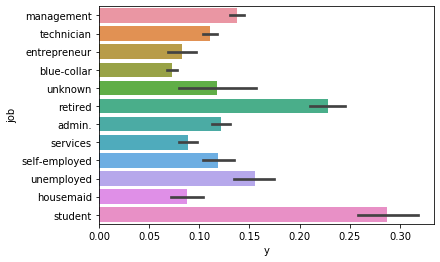

In [59]:
sns.barplot(dataset['y'], dataset['job'])
plt.show()

#### Resposta
As profissões que apresentam maior potencial em assinar um depósito à prazo são os Aposentados (***retired***) e os Estudantes (***student***). Situação que faz bastante sentido, tendo em vista que os estudantes buscam estabilidade no futuro, obtendo lucro com o juros do depósito à prazo e guardando dinheiro para o um momento posterior. Já os aposentados tendem a não gastar muito seu dinheiro, dessa forma, podendo aplicar seu dinheiro e  e lucrar com a taxa de juros, conseguem aumentar sua receita.

2. **Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?**


In [60]:
df_camp = pd.DataFrame()

In [61]:
dataset['y'] = le.inverse_transform(dataset['y'])
df_camp = pd.DataFrame()
df_camp['campaign_nao'] = (dataset[dataset['y'] == 'no'][['y','campaign']].describe())['campaign']
df_camp['campaign_sim'] = (dataset[dataset['y'] == 'yes'][['y','campaign']].describe())['campaign']

df_camp

,campaign_nao,campaign_sim
count,39922.000000,5289.000000
mean,2.846350,2.141047
std,3.212767,1.921826
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,63.000000,32.000000


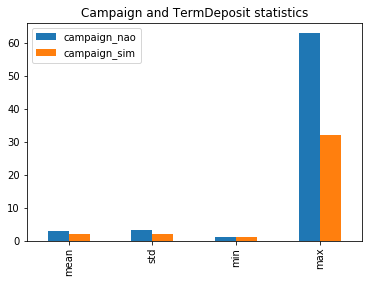

In [62]:
df_camp.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign and TermDeposit statistics')

Mapeamento de classes: {'no': 0, 'yes': 1}


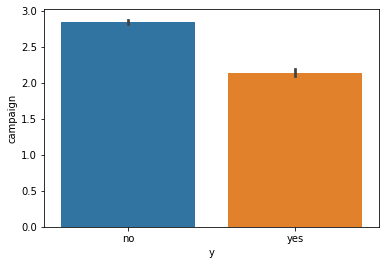

In [63]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de classes: {}".format(le_mapping))
sns.barplot(dataset['y'], dataset['campaign'])
plt.show()

#### Resposta
Os pontos relevantes a serem observados durante a campanha, é que os clientes que receberem uma grande quantidade de contatos recusaram a proposta de assinar um contrato à prazo, e que para conquistar o cliente com o objetivo do mesmo assinar um contrato à prazo é de em média 3 contatos. De acordo com a análise realizada, quando aumenta-se a quantidade de contatos, o cliente não assinará o contrato à prazo.

3. **Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**
#### Resposta
Média de 2 contatos e no máximo até 4 contatos. Não exceder de 4 contatos, para não gastar tempo, esforço e dinheiro com um cliente que possivelmente não assinará um contrato à prazo.

4. **O resultado da campanha anterior tem relevância na campanha atual?**


Mapeamento de classes: {'no': 0, 'yes': 1}


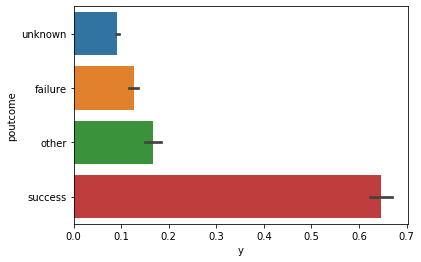

In [64]:
le = LabelEncoder()
dataset['y'] = le.fit_transform(dataset['y'])
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de classes: {}".format(le_mapping))
sns.barplot(dataset['y'], dataset['poutcome'])
plt.show()

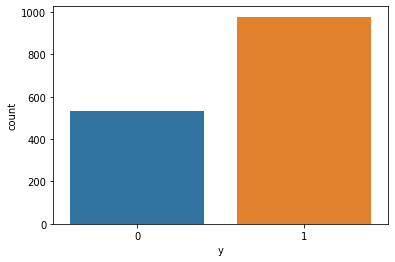

In [65]:
dataset_poutcome_success = dataset[dataset['poutcome'] == 'success']
sns.countplot(dataset_poutcome_success['y'])

In [66]:
dataset_poutcome_success_grafico = dataset_poutcome_success.describe()['y']
dataset_poutcome_success_grafico['mean']

0.6472534745201853

#### Resposta
Sim, inclusive está entre as 5 features mais importantes para o algoritmo Random Forest. A probabilidade de um cliente que assinou um contrato à prazo anteriormente assinar um novo contrato na nova campanha é de aproximadamente 65%.

5. **Qual o fator determinante para que o banco exija um seguro de crédito?**
#### Resposta
quando o cliente possui um balanço (***balance***) negativo.

6. **Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**

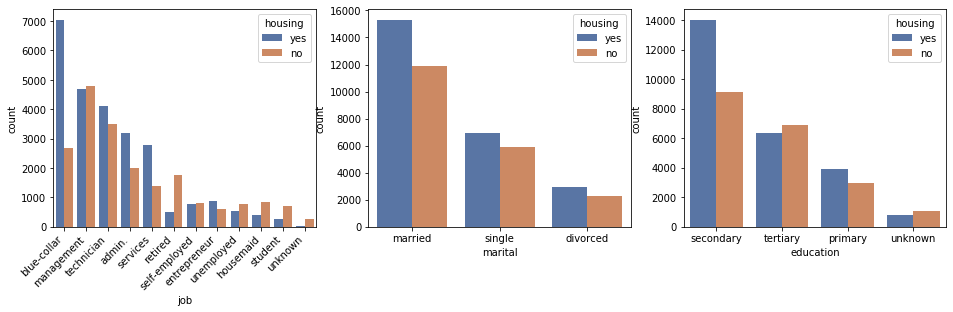

In [67]:
plt.figure(figsize=[16,4])

plt.subplot(1,3,1)
chart = sns.countplot(x='job', hue='housing', data=dataset, palette="deep", order = dataset['job'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,3,2)
sns.countplot(x='marital', hue='housing', data=dataset, palette="deep", order = dataset['marital'].value_counts().index)

plt.subplot(1,3,3)
sns.countplot(x='education', hue='housing', data=dataset, palette="deep", order = dataset['education'].value_counts().index)

plt.show()

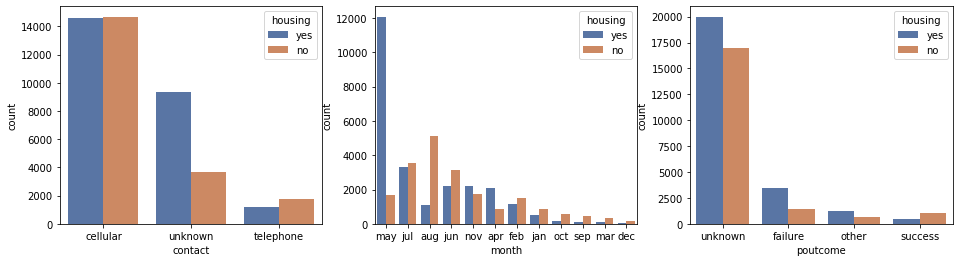

In [68]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.countplot(x='contact', hue='housing', data=dataset,palette="deep", order = dataset['contact'].value_counts().index)
plt.subplot(1,3,2)
sns.countplot(x='month', hue='housing', data=dataset,palette="deep", order = dataset['month'].value_counts().index)
plt.subplot(1,3,3)
sns.countplot(x='poutcome', hue='housing', data=dataset,palette="deep", order = dataset['poutcome'].value_counts().index)
plt.show()

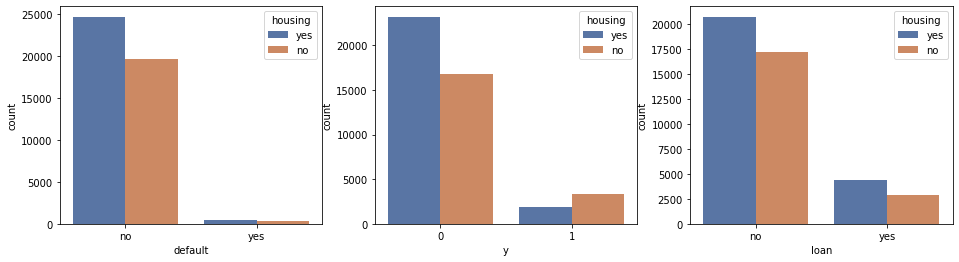

In [69]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.countplot(x='default', hue='housing', data=dataset,palette="deep", order = dataset['default'].value_counts().index)
plt.subplot(1,3,2)
sns.countplot(x='y', hue='housing', data=dataset,palette="deep", order = dataset['y'].value_counts().index)
plt.subplot(1,3,3)
sns.countplot(x='loan', hue='housing', data=dataset,palette="deep", order = dataset['loan'].value_counts().index)
plt.show()

In [70]:
colunas_categoricas =list(set(dataset.columns) - set(dataset._get_numeric_data().columns))
le = LabelEncoder()
dataset['housing'] = le.fit_transform(dataset['housing'])

In [71]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de classes: {}".format(le_mapping))

Mapeamento de classes: {'no': 0, 'yes': 1}


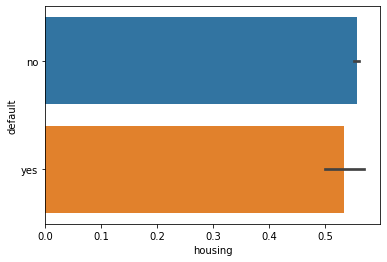

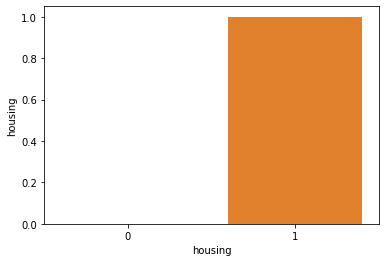

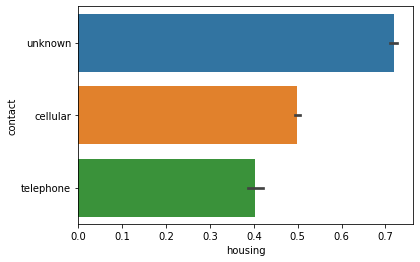

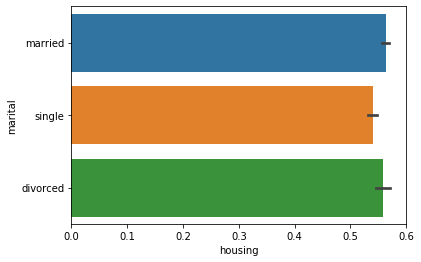

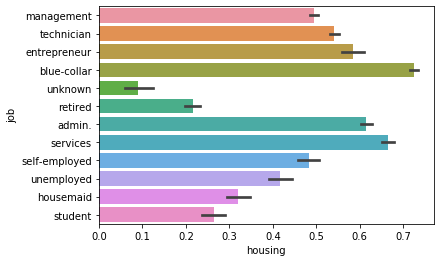

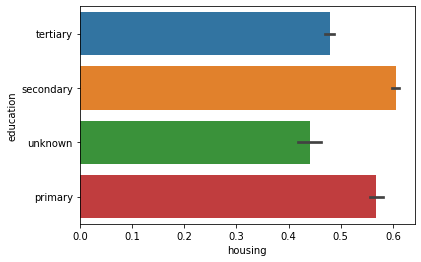

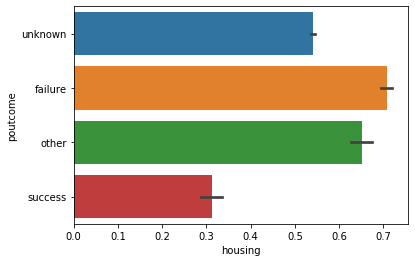

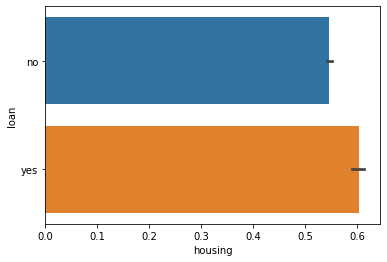

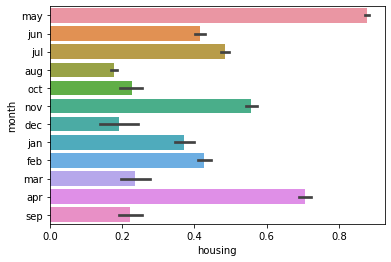

In [72]:
for coluna in dataset[colunas_categoricas]:
    sns.barplot(dataset['housing'], dataset[coluna])
    plt.show()
dataset['housing'] = le.inverse_transform(dataset['housing'])

#### Resposta
As features que possuem grande representatividade são ocupação (***job***), resultado da campanha anterior (***poutcome***) e campanha atual (***y***) e crédito por padrão (***default***)


- Ocupação (***job***):
    - ***blue-collar***, ***services***, ***admin*** são as ocupações com a maior representatividade com empréstimo imobiliário.
    - Como existe um desbalanceamento na quantidade de clientes por ocupação. Visualizando a quantidade máxima de representantes por ocupação ao invés da representatividade:
        - ***blue-collar***, ***management***, ***technician***

- Campanha anterior (***poutcome***) e campanha atual (***y***):
    - A maior parte dos clientes que possuem empréstimo imobiliário não assinaram um contrato à prazo na campanha anterior e nem na campanha atual.
    - Aparentemente, os clientes que possuem empréstimo imobiliário estão em outro momento de vida, comparado aos clientes que assinaram contrato à prazo.
    - Não focar nos clientes que possuem empréstimo imobiliário é uma opção.

- Tem crédito por padrão (***default***):
    - Grande maioria dos clientes que realizaram empréstimo imobiliário não tem crédio por padrão. O que faz muito sentido, pois se o cliente tem crédito por padrão, talvez não necessite realizar um empréstimo imobiliário para comprar um imóvel.